In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from scipy.spatial import distance_matrix
import math

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read Data
data = input_data.read_data_sets(".",one_hot = True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [3]:
def choose_data(data,label):
    l_list=np.argmax(label,axis=1)
    l_count=[0 for a in range(10)]
    final_d=[]
    final_l=[]
    for d,l,l_num in zip(data,label,l_list):
        if l_count[l_num]!=1000:
            final_d.append(d)
            final_l.append(l)
            l_count[l_num]+=1
        if sum(l_count)==10000:
            break
    return np.array(final_d),np.array(final_l) 

In [4]:
################in this part we need to use tensor flow
def get_distance(image,data):
    return np.sqrt(tf.power((image-data),2).sum(axis=1))

def get_distance_matrix(image,data):
    d_matrix=[]
    count=0
    for d in data:
        d_matrix.append(get_distance(image,d))
        print(count)
        count+=1
    return np.array(d_matrix)

In [7]:
train_data,train_label=choose_data(data.train.images,data.train.labels)

In [8]:
dis_matrix=distance_matrix(train_data,train_data)

In [59]:
dis_matrix

array([[ 0.        , 11.85839558, 10.92733383, ..., 11.71991539,
        10.92538357, 11.01868248],
       [11.85839558,  0.        ,  8.58878231, ..., 10.53678799,
         8.66295242, 10.69352245],
       [10.92733383,  8.58878231,  0.        , ...,  9.37636375,
         8.48014832,  9.27800846],
       ...,
       [11.71991539, 10.53678799,  9.37636375, ...,  0.        ,
         9.22331619,  6.52865839],
       [10.92538357,  8.66295242,  8.48014832, ...,  9.22331619,
         0.        ,  7.85611916],
       [11.01868248, 10.69352245,  9.27800846, ...,  6.52865839,
         7.85611916,  0.        ]])

In [73]:
#################the column_dimension for img should be the same as dis_matrix
#############x should be a tensor
def dis_loss(x,dis_m):
    return tf.reduce_mean(tf.subtract(x,dis_m)**2)

In [96]:
def tf_get_distance_matrix(A):
    #A = tf.expand_dims(A,0)
    B=tf.expand_dims(A,1)
    r=tf.subtract(A,B*0.9999)
    r=tf.pow(r,2)
    r=tf.reduce_sum(r,2)
    r=tf.sqrt(r)
    return r

In [10]:
tf_dis_matrix,tf_train_data,tf_train_label=tf.constant(dis_matrix),tf.constant(train_data),tf.constant(train_label)

In [98]:
tf.reset_default_graph()
D=tf.placeholder(tf.float32, shape=(10000, 10000))
x_new=tf.get_variable("x_new", [10000,2],initializer = tf.random_normal_initializer(stddev=0.02))
d_new=tf_get_distance_matrix(x_new)
Loss=dis_loss(d_new,D)

In [133]:
train_op = tf.train.AdamOptimizer(0.1).minimize(Loss)

In [134]:
model = tf.global_variables_initializer()
#dis_matrix=tf.constant(dis_matrix)
with tf.Session() as session:
    session.run(model)
    for i in range(500):
        _,loss,d_n,x_n,D_p=session.run([train_op,Loss,d_new,x_new,D],feed_dict={D:dis_matrix})
        print(loss)
        #print(loss,d_n,x_n)
        #print(D_p)
        
    x_value = session.run(x_new)
    #print("Predicted model: {a:.3f}x + {b:.3f}".format(a=w_value[0], b=w_value[1]))

106.37416
102.9821
99.681404
96.43578
93.26018
90.161415
87.14346
84.20871
81.35841
78.59251
75.91034
73.31118
70.7942
68.35858
66.0035
63.72817
61.531734
59.41334
57.37203
55.406837
53.516758
51.700706
49.95756
48.286106
46.685078
45.1531
43.688744
42.290497
40.95676
39.685894
38.47618
37.325867
36.23316
35.196228
34.21321
33.28225
32.40145
31.568943
30.782848
30.041283
29.342388
28.684326
28.06526
27.483389
26.936932
26.424139
25.943296
25.492733
25.070803
24.675909
24.306496
23.961061
23.638134
23.33631
23.054228
22.790585
22.544123
22.313652
22.098017
21.896147
21.707003
21.529608
21.363045
21.206451
21.059013
20.91998
20.788641
20.664345
20.546488
20.434507
20.3279
20.226189
20.128954
20.0358
19.946383
19.860382
19.777515
19.697529
19.620195
19.545313
19.472704
19.402214
19.3337
19.267054
19.20216
19.138935
19.0773
19.01719
18.95854
18.90131
18.84545
18.79092
18.737696
18.685747
18.635046
18.585571
18.5373
18.49022
18.444304
18.39954
18.35591
18.313395
18.271982
18.231651
18.19238

In [144]:
def visulize_graph(data,label):
    point_x=[[] for i in range(10)]
    point_y=[[] for i in range(10)]
    for d,l in zip(data,label):
        num_l=np.argmax(l)
        #print(num_l)
        point_x[num_l].append(d[0])
        point_y[num_l].append(d[1])
    colors=['red','blue','green','yellow','gray','pink','olive','purple','cyan','orange']
    for i in range(len(point_x)):
        plt.scatter(point_x[i],point_y[i],color=colors[i],label=i)
        #elif num_l==1:
    '''
    plt.scatter(point_x[1],point_y[1],color=,label=1)
        #elif num_l==2:
    plt.scatter(point_x[2],point_y[2],color=,label=2)
        #elif num_l==3:
    plt.scatter(d[0],d[1],color=,label=num_l)
        #elif num_l==4:
    plt.scatter(d[0],d[1],color=,label=num_l)
        #elif num_l==5:
    plt.scatter(d[0],d[1],color=,label=num_l)
        #elif num_l==6:
    plt.scatter(d[0],d[1],color=,label=num_l)
        #elif num_l==7:
    plt.scatter(d[0],d[1],color=,label=num_l)
        #elif num_l==8:
    plt.scatter(d[0],d[1],color=label=num_l)
        #else:
    plt.scatter(d[0],d[1],color=,label=num_l)
    '''
    plt.legend(loc='upper right')
    plt.show()

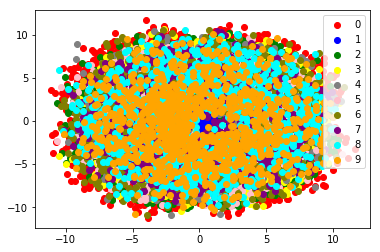

In [145]:
visulize_graph(x_value,train_label)

In [139]:
x_value[0]

array([9.038732 , 0.6249025], dtype=float32)

In [84]:
with tf.Session() as session:
    session.run(model)
    print(session.run(test_d_p))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [33]:
x_n

array([[ 0.01026433,  0.02401986],
       [-0.0026996 ,  0.00595489],
       [ 0.01414543, -0.01524826],
       ...,
       [ 0.01528195,  0.00451525],
       [ 0.00141305,  0.00675551],
       [-0.00909525, -0.00934558]], dtype=float32)